In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
import SPIB
import test_SPIB_training as training
import time
import os
import constraints
import subprocess
import matplotlib
from matplotlib import colors as c
print(os.getcwd())

/media/ebeyerle/Expansion/Seagate/umd/spib/pocket/new/GROMACS/half/molinero2/prod/biased/z/wall1.1/thermostat_water/TERP


In [3]:
def reconstruct_SPIB(beta, gamma, bandwidth, nn, lag, RC_dim = 2, pseduo_dim = 10, output_dim = 10, data_shape = (2,),
                    encoder_type = 'Nonlinear', seed = '0', lr = 0.0001000, path = './'):

    neuron_num1 = nn
    neuron_num2 = nn
    device = torch.device("cpu") #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Update Label
    ## Remember to update both directories
    UpdateLabel = True
    prefix_00 = path + str(bandwidth) + '/neurons/' + str(nn)
    representative_inputs_path = prefix_00 + '/Unweighted_d=%d_t=%d_b=%.9f_gamma=%.9f_learn=%.6f_representative_inputs%d.npy' % (RC_dim, lag, beta, gamma, lr, seed)
    prefix = prefix_00 + "/Unweighted_d=%d_t=%d_b=%.9f_gamma=%.9f_learn=%.6fcpt%d/IB_final_cpt.pt" % (RC_dim, lag, beta, gamma, lr, seed)

    print(prefix)
    restore_path=prefix
    representative_inputs = torch.tensor(np.load(representative_inputs_path))
    index = 1
    encoder_type = 'Nonlinear'
    IB = SPIB.SPIB(encoder_type, RC_dim, output_dim, data_shape, device, UpdateLabel, neuron_num1, neuron_num2)
    IB.reset_representative(representative_inputs)
    checkpoint=torch.load(restore_path)
    IB.load_state_dict(checkpoint['state_dict'])
    weight0=IB.encoder[0].weight.cpu().data.numpy()
    weight1=IB.encoder[2].weight.cpu().data.numpy()
    weight2=IB.encoder_mean.weight.cpu().data.numpy()
    bias0=IB.encoder[0].bias.cpu().data.numpy()
    bias1=IB.encoder[2].bias.cpu().data.numpy()
    bias2=IB.encoder_mean.bias.cpu().data.numpy()
    return IB

def reconstruct_SPIB_HP(beta, gamma, bandwidth, nn, lag, RC_dim = 2, pseduo_dim = 10, output_dim = 10, data_shape = (2,),
                    encoder_type = 'Nonlinear', seed = '0', lr = 0.0001000, path = './'):

    neuron_num1 = nn
    neuron_num2 = nn
    device = torch.device("cpu") #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Update Label
    ## Remember to update both directories
    UpdateLabel = True
    prefix_00 = path + str(bandwidth) + '/neurons/' + str(nn)
    representative_inputs_path = prefix_00 + '/Unweighted_d=%d_t=%d_b=%.9f_gamma=%.9f_learn=%f_representative_inputs%d.npy' % (RC_dim, lag, beta, gamma, lr, seed)
    prefix = prefix_00 + "/Unweighted_d=%d_t=%d_b=%.9f_gamma=%.9f_learn=%fcpt%d/IB_final_cpt.pt" % (RC_dim, lag, beta, gamma, lr, seed)

    print(prefix)
    restore_path=prefix
    representative_inputs = torch.tensor(np.load(representative_inputs_path))
    index = 1
    encoder_type = 'Nonlinear'
    IB = SPIB.SPIB(encoder_type, RC_dim, output_dim, data_shape, device, UpdateLabel, neuron_num1, neuron_num2)
    IB.reset_representative(representative_inputs)
    checkpoint=torch.load(restore_path)
    IB.load_state_dict(checkpoint['state_dict'])
    weight0=IB.encoder[0].weight.cpu().data.numpy()
    weight1=IB.encoder[2].weight.cpu().data.numpy()
    weight2=IB.encoder_mean.weight.cpu().data.numpy()
    bias0=IB.encoder[0].bias.cpu().data.numpy()
    bias1=IB.encoder[2].bias.cpu().data.numpy()
    bias2=IB.encoder_mean.bias.cpu().data.numpy()
    return IB

In [8]:
params = {'legend.fontsize': 16,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

In [9]:
# load from file
file_path = '../analysis/big/sparse/delta_variational/1e-1/neurons/64/'
b = float(np.loadtxt('b.txt'))
beta = b
timestep = 0.2
#for i in range(2, 6):
#    print(i)
i = 2
driver_colvar = np.load('../sparse_traj_data.npy')
weights = np.load('../sparse_weights.npy')
energy = np.loadtxt('../sparse_e.txt', max_rows = len(driver_colvar))
traj_labels = np.load('../sparse_init_traj_labels.npy')
rho = driver_colvar[:,3]
z = driver_colvar[:,2]
if i == 2:
    big_colvar = driver_colvar
    big_weights = weights
    big_energy = energy
    big_traj_labels = traj_labels
else:
    big_colvar = np.concatenate((big_colvar, driver_colvar))
    big_weights = np.concatenate((big_weights, weights))
    big_energy = np.concatenate((big_energy, energy))
    big_traj_labels = np.concatenate((big_traj_labels, traj_labels))

print(len(big_colvar), len(big_weights), len(big_energy), len(big_traj_labels))

76100 76100 76100 76100


In [10]:
big_driver_colvar = big_colvar
rho = big_driver_colvar[:,3]
z = big_driver_colvar[:,2]
Nwp = big_driver_colvar[:,-2]
Nwm = big_driver_colvar[:,-1]

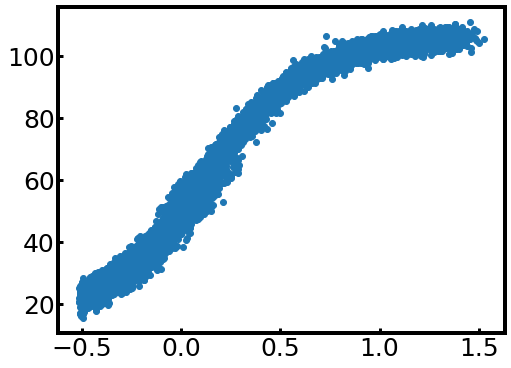

In [11]:
plt.scatter(z[::10], Nwm[::10])

In [12]:
x = z
y = Nwm

data = np.copy(big_colvar)
Ut = np.copy(big_energy)

In [13]:
b = float(np.loadtxt('b.txt'))
output_thermo = True

64 0.01 0.001 5 1e-1
../analysis/big/sparse/delta_variational/1e-1/neurons/64/Unweighted_d=1_t=5_b=0.010000000_gamma=0.001000000_learn=0.000100cpt0/IB_final_cpt.pt
[0 2 7 8]


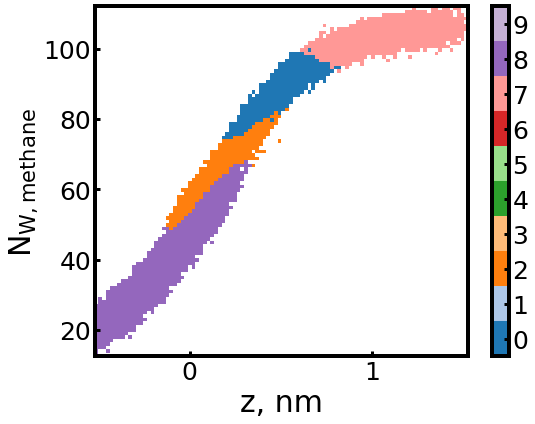

/tmp/ipykernel_1097696/3822857974.py:95: RuntimeWarning: invalid value encountered in true_divide
  RC=np.divide(hist_RC[0],hist[0])


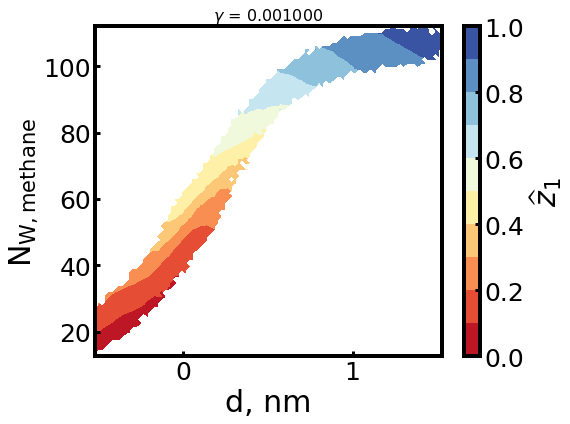

1.000000001 tensor(5.3358, dtype=torch.float64, grad_fn=<MaxBackward1>)


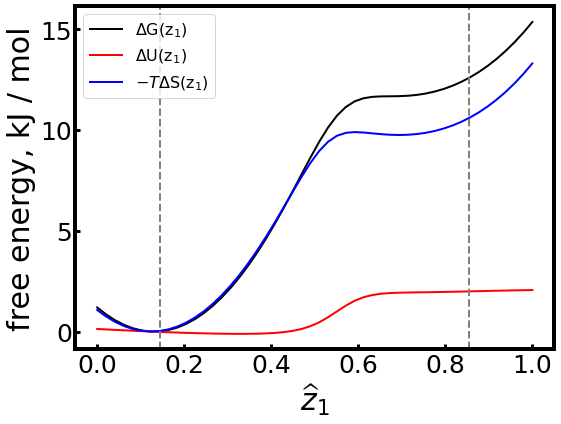

In [14]:
import matplotlib
from matplotlib import colors as c
nreps = 1
seed = 0
lr = 0.0001000
z1_bar_list = []
z_list = []
z1_thermo_list = []
z1_filtered_thermo_list = []
traj_labels_list = []
for nn in [64]:
    for lag in [5]:
        for beta in [1e-2]:
            for gamma in [1e-3]:
                for bandwidth in ["1e-1"]:
                    print(nn, beta, gamma, lag, bandwidth)
                    path = '../analysis/big/sparse/delta_variational/'


                    try:
                        prefix='../analysis/big/sparse/delta_variational/' + bandwidth + '/neurons/' + str(nn) + '/Unweighted_d=1_t=' + str(lag) + '_b=%.9f_gamma=%.9f_learn=%.6f' % (beta, gamma, lr)
                        #print(prefix)
                        repeat = str(seed)
                        IB = reconstruct_SPIB(beta, gamma, bandwidth, nn, lag, RC_dim = 1, pseduo_dim = 10, output_dim = 10, data_shape = (6,),
                        encoder_type = 'Nonlinear', seed = seed, path = path)
                        data_torch = torch.Tensor(data)
                        data_torch.requires_grad = True
                        outputs, z_sample, z_mean, z_logvar = IB.forward(data_torch)

                        tensor_weights = torch.Tensor(big_weights)
                        aux_loss, G11, U11, S11 = constraints.delta_variational(data_torch, 
                                                                                     z_mean, Ut, 
                                                                                     bins = 50, bandwidth = 1.0, 
                                                                                     output_thermo = output_thermo,
                                                                                     b = b, weights = tensor_weights)
                        z = z_mean.detach().numpy()

                        #print('loading labels...')
                        dummy = []
                        for i in range(nreps):
                            dummy.append(np.load(prefix + "_traj" + str(i) + "_labels" + repeat + ".npy"))
                        traj_labels = np.concatenate(dummy, axis = 0)

                        labels=traj_labels
                        dtrajs = labels.argmax(1)
                        print(np.unique(dtrajs))
                        #if len(np.unique(dtrajs)) <= 2:
                        #    break
                        hist=plt.hist2d(x,y,bins=100)


                        state_num=labels.shape[1]
                        state_labels=np.arange(state_num)

                        hist_state=np.zeros([state_num]+list(hist[0].shape))

                        for i in range(state_num):
                            hist_state[i]=plt.hist2d(x,y,bins=[hist[1],hist[2]],weights=labels[:,i])[0]

                        label_map50=np.argmax(hist_state,axis=0).astype(float)
                        label_map50[hist[0]==0]=np.nan
                        plt.close()
                        fig, ax = plt.subplots()

                        fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: state_labels[x])
                        tickz = np.arange(0,len(state_labels))

                        cMap = c.ListedColormap(plt.cm.tab20.colors[0:10])
                        im=ax.pcolormesh(hist[1], hist[2], label_map50.T, cmap=cMap, vmin=-0.5, vmax=len(state_labels)-0.5)
                        cb1 = fig.colorbar(im,ax=ax,format=fmt, ticks=tickz)

                        # plot labels of occupied states
                        dummy = labels.sum(0)
                        xloc = -0.75
                        #for n, i in enumerate(dummy):
                        #    if i != 0:
                        #        ax.text(xloc,0,str(n),horizontalalignment='center',verticalalignment='center',fontsize=64)
                        #        xloc += 0.2

                        plt.xlabel(r"z, nm")
                        plt.ylabel(r"N$_{\mathrm{W, methane}}$")
                        plt.tight_layout()
                        #plt.savefig(prefix + '_metastable_decomposition.pdf', dpi = 300)
                        plt.show()
                        plt.close()

                        z_1D_hat = (z_mean[:,0] - z_mean[:,0].min()) / (z_mean[:,0].max() - z_mean[:,0].min())


                        hist=np.histogram2d(x,y,bins=100)
                        hist_RC=np.histogram2d(x,y,bins=[hist[1],hist[2]], weights = z_1D_hat.detach().numpy())

                        fig, ax = plt.subplots()

                        RC=np.divide(hist_RC[0],hist[0])

                        im=ax.contourf(RC.T, extent=[hist_RC[1][0],hist_RC[1][-1],hist_RC[2][0],hist_RC[2][-1]],levels=10,
                                            cmap='RdYlBu')
                        cb1 = fig.colorbar(im,ax=ax)
                        cb1.set_label(r'$\widehat{z}_1$')

                        plt.xlabel(r"d, nm")
                        plt.ylabel(r"N$_{\mathrm{W, methane}}$")
                        plt.title(r'$\gamma$ = %f' % (gamma), fontsize = 16)
                        plt.tight_layout()
                        #plt.savefig(prefix + '_RC_projection1.pdf', dpi = 300)
                        plt.show()
                        plt.close()

                        zbins = np.linspace(z_1D_hat.detach().numpy().min() - 1e-9, z_1D_hat.detach().numpy().max() + 1e-9, len(U11))
                        print(zbins[S11.argmax()], S11.max())
                        plt.plot(zbins, G11.detach().numpy() / b, lw = 2, c = 'k', label = r'$\Delta$G(z$_1$)')
                        plt.plot(zbins, U11.detach().numpy() / b, lw = 2, c = 'r', label = r'$\Delta$U(z$_1$)')
                        plt.plot(zbins, S11.detach().numpy() / b, lw = 2, c = 'b', label = r'$-T\Delta$S(z$_1$)')
                        plt.axvline(z_1D_hat.detach().numpy().min() + 0.5 * z_1D_hat.detach().numpy().std(), lw =2, c = 'grey', ls = '--')
                        plt.axvline(z_1D_hat.detach().numpy().max() - 0.5 * z_1D_hat.detach().numpy().std(), lw =2, c = 'grey', ls = '--')  
                        plt.legend()
                        plt.xlabel(r'$\widehat{z}_1$')
                        plt.ylabel('free energy, kJ / mol')
                        #plt.ylim((-50, 50))
                        plt.tight_layout()
                        #plt.savefig('figures/dSz_point_free_energy_profile_gamma_' + str(gamma) + '.pdf', dpi = 300)
                        plt.show()
                        plt.close()


                        # select endpoints plus a buffer of one standard deviation
                        z_min = z[:,0].min()
                        z_std = z[:,0].std()
                        z_max = z[:,0].max()


                        bins = 50
                        zbins = torch.linspace(z_min - 1e-9, z_max + 1e-9, bins)[:, None]
                        path = ~((zbins >= float(z_min + 0.5 * z_std)) ^ (zbins <= float(z_max - 0.5 * z_std)))
                        path = torch.ravel(path)
                        z1_bar_list.append(np.nanmax(S11[path].detach().numpy()) / b)
                        
                        thermo1_gamma_filtered = np.column_stack([G11[path].detach().numpy(), U11[path].detach().numpy(), S11[path].detach().numpy()]) / b
                        z1_filtered_thermo_list.append(thermo1_gamma_filtered)


                        bins = 50
                        zbins = torch.linspace(z_min - 1e-9, z_max + 1e-9, bins)[:, None]
                        path = ~((zbins >= float(z_min + 0.5 * z_std)) ^ (zbins <= float(z_max - 0.5 * z_std)))
                        path = torch.ravel(path)
                        
                        z1_thermo_list.append(np.column_stack([G11.detach().numpy(), U11.detach().numpy(), S11.detach().numpy()]) / b)
                        z_list.append(z)
                        
                    except FileNotFoundError:
                        pass
                    
z1_thermo = np.array(z1_thermo_list)

z1_filtered_thermo = np.array(z1_filtered_thermo_list, dtype = 'object')

zs = np.array(z_list)

In [15]:
z_hat = z_1D_hat.detach().numpy()

In [16]:
digital_z_hat = np.digitize(z_hat,  np.linspace(z_hat.min(), z_hat.max(), 10)).ravel() - 1

/tmp/ipykernel_821979/2040930749.py:8: RuntimeWarning: invalid value encountered in true_divide
  RC=np.divide(hist_RC[0],hist[0])
/tmp/ipykernel_821979/2040930749.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[k_list], y[k_list], c = color_list[i], marker = '*', s = 50, zorder = 10, alpha = 0.25)


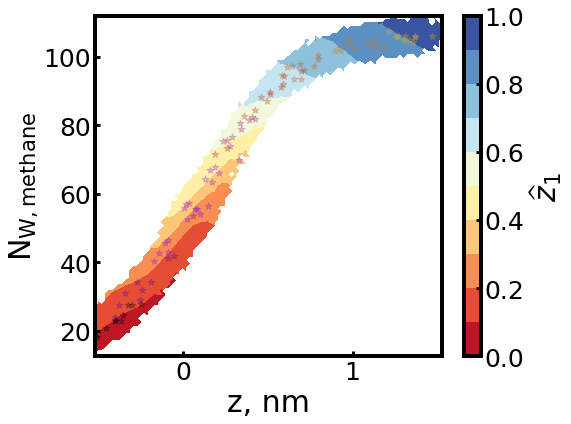

In [16]:
# get frames at the level sets of z

hist=np.histogram2d(x,y,bins=100)
hist_RC=np.histogram2d(x,y,bins=[hist[1],hist[2]], weights = z_hat)

fig, ax = plt.subplots()

RC=np.divide(hist_RC[0],hist[0])

im=ax.contourf(RC.T, extent=[hist_RC[1][0],hist_RC[1][-1],hist_RC[2][0],hist_RC[2][-1]],levels=10,
                    cmap='RdYlBu')
cb1 = fig.colorbar(im,ax=ax)
cb1.set_label(r'$\widehat{z}_1$')

color_list = plt.cm.gnuplot(np.linspace(0, 1, digital_z_hat.max() + 1))
for i in range(digital_z_hat.max()):

    k_list = np.random.choice(np.where(digital_z_hat == i)[0], size = 10)

                        
    plt.scatter(x[k_list], y[k_list], c = color_list[i], marker = '*', s = 50, zorder = 10, alpha = 0.25)
    
    #np.savetxt('./gamma1e-3_frames_level_set_%s.txt' % i, k_list, fmt = '%d')
plt.xlabel(r"z, nm")
plt.ylabel(r"N$_{\mathrm{W, methane}}$")
plt.tight_layout()
#plt.savefig(prefix + 'z_Nwm_metastable_decomposition.pdf', dpi = 300)
plt.show()
plt.close()

/tmp/ipykernel_1097696/3080713645.py:8: RuntimeWarning: invalid value encountered in true_divide
  RC=np.divide(hist_RC[0],hist[0])
/tmp/ipykernel_1097696/3080713645.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[k_list].mean(), y[k_list].mean(), c = color_list[i], marker = '*', s = 250, zorder = 10, alpha = 1)


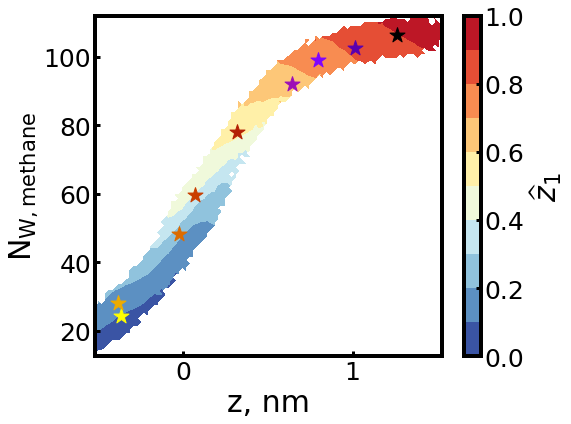

In [24]:
# get frames at the level sets of z

hist=np.histogram2d(x,y,bins=100)
hist_RC=np.histogram2d(x,y,bins=[hist[1],hist[2]], weights = z_hat)

fig, ax = plt.subplots()

RC=np.divide(hist_RC[0],hist[0])

im=ax.contourf(RC.T, extent=[hist_RC[1][0],hist_RC[1][-1],hist_RC[2][0],hist_RC[2][-1]],levels=10,
                    cmap='RdYlBu_r')
cb1 = fig.colorbar(im,ax=ax)
cb1.set_label(r'$\widehat{z}_1$')

color_list = plt.cm.gnuplot_r(np.linspace(0, 1, digital_z_hat.max()))
for i in range(digital_z_hat.max()):

    k_list = np.where(digital_z_hat == i)[0][:10]

                        
    plt.scatter(x[k_list].mean(), y[k_list].mean(), c = color_list[i], marker = '*', s = 250, zorder = 10, alpha = 1)
    
    #np.savetxt('./gamma1e-3_frames_level_set_%s.txt' % i, k_list, fmt = '%d')
plt.xlabel(r"z, nm")
plt.ylabel(r"N$_{\mathrm{W, methane}}$")
plt.tight_layout()
plt.savefig('gamma1e-3_TERP_level_set_samples.pdf', dpi = 300)
plt.show()
plt.close()

4


/tmp/ipykernel_821979/115255969.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[k_list], y[k_list], c = color_list[i], marker = '*', s = 50, zorder = 10, alpha = 0.25)


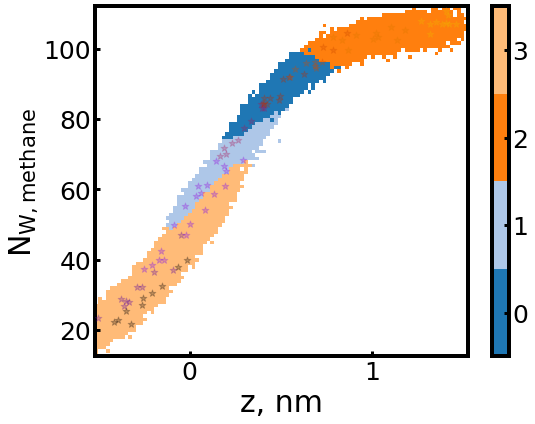

In [17]:
idx = np.argwhere(np.all(traj_labels == 0, axis=0))
labels = np.delete(traj_labels, idx, axis=1)
dtrajs = labels.argmax(1)
nstates = len(np.unique(dtrajs))
print(nstates)

hist=plt.hist2d(x,y,bins=100)


state_num=labels.shape[1]
state_labels=np.arange(state_num)

hist_state=np.zeros([state_num]+list(hist[0].shape))

for i in range(state_num):
    hist_state[i]=plt.hist2d(x,y,bins=[hist[1],hist[2]],weights=labels[:,i])[0]

label_map50=np.argmax(hist_state,axis=0).astype(float)
label_map50[hist[0]==0]=np.nan
plt.close()
fig, ax = plt.subplots()

fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: state_labels[x])
tickz = np.arange(0,len(state_labels))

cMap = c.ListedColormap(plt.cm.tab20.colors[0:nstates])
im=ax.pcolormesh(hist[1], hist[2], label_map50.T, cmap=cMap, vmin=-0.5, vmax=len(state_labels)-0.5)
cb1 = fig.colorbar(im,ax=ax,format=fmt, ticks=tickz)

color_list = plt.cm.gnuplot(np.linspace(0, 1, digital_z_hat.max() + 1))
for i in range(digital_z_hat.max()):

    k_list = np.random.choice(np.where(digital_z_hat == i)[0], size = 10)

                        
    plt.scatter(x[k_list], y[k_list], c = color_list[i], marker = '*', s = 50, zorder = 10, alpha = 0.25)
    
    np.savetxt('./gamma1e-3_frames_level_set_%s.txt' % i, k_list, fmt = '%d')
plt.xlabel(r"z, nm")
plt.ylabel(r"N$_{\mathrm{W, methane}}$")
plt.tight_layout()
#plt.savefig(prefix + 'z_Nwm_metastable_decomposition.pdf', dpi = 300)
plt.show()
plt.close()

71881
75261
67906
27890
63957
7239
28529
28862
63584
71778
(10, 6)


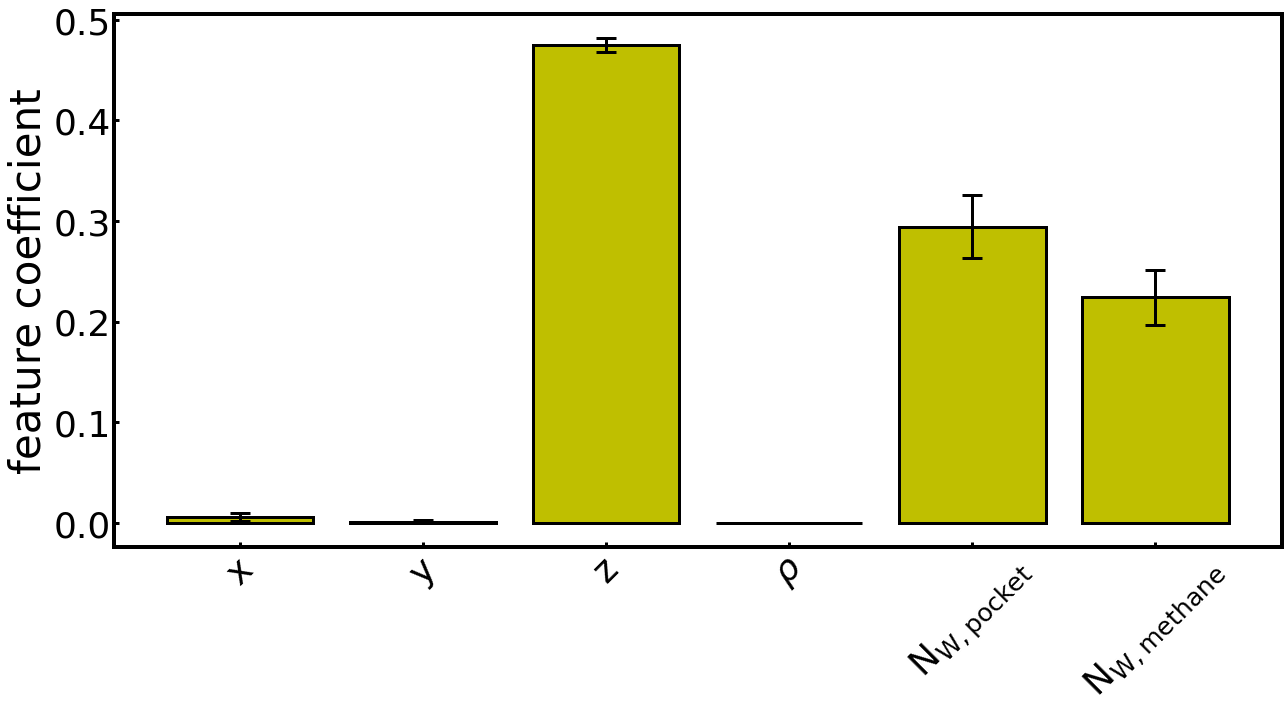

63859
19991
12365
67714
32929
62511
75249
72535
171
54197
(10, 6)


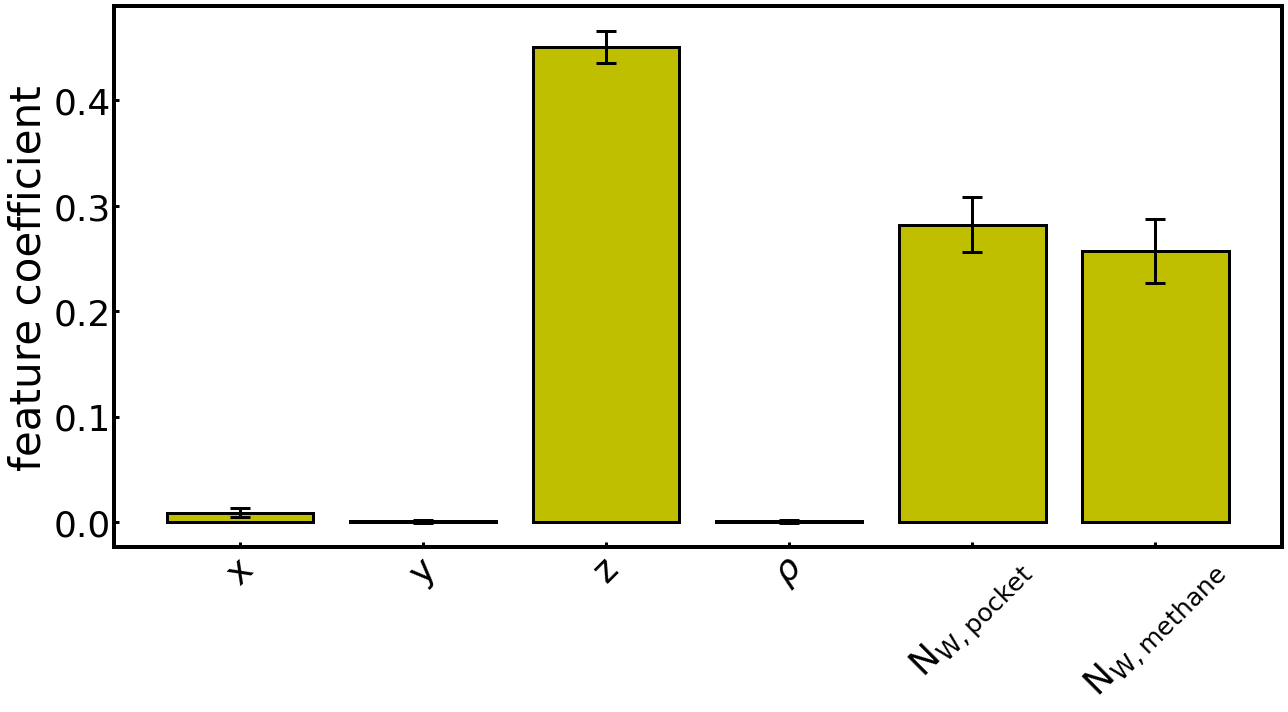

50619
58880
24765
67527
16228
22824
835
62619
24704
59173
(10, 6)


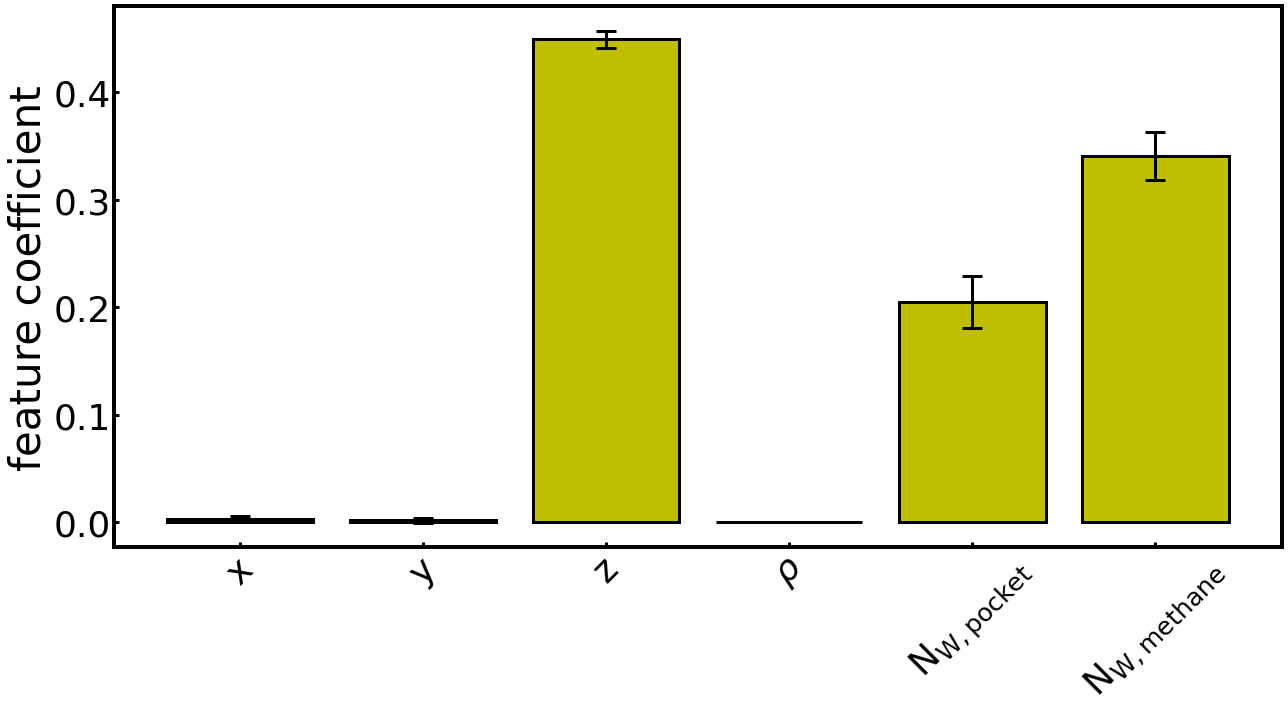

55672
5554
52318
31664
2932
11755
62266
73569
7434
64060
(10, 6)


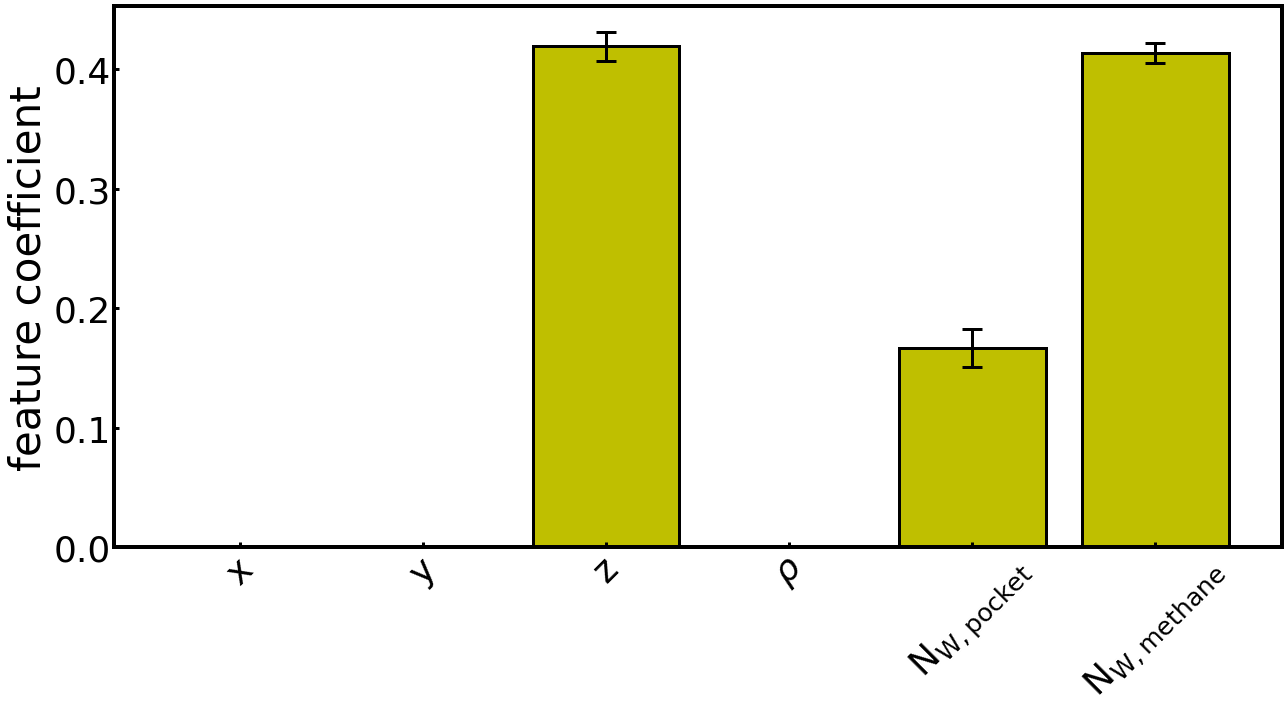

20897
22309
19663
60834
41188
16669
21835
37659
65497
67391
(10, 6)


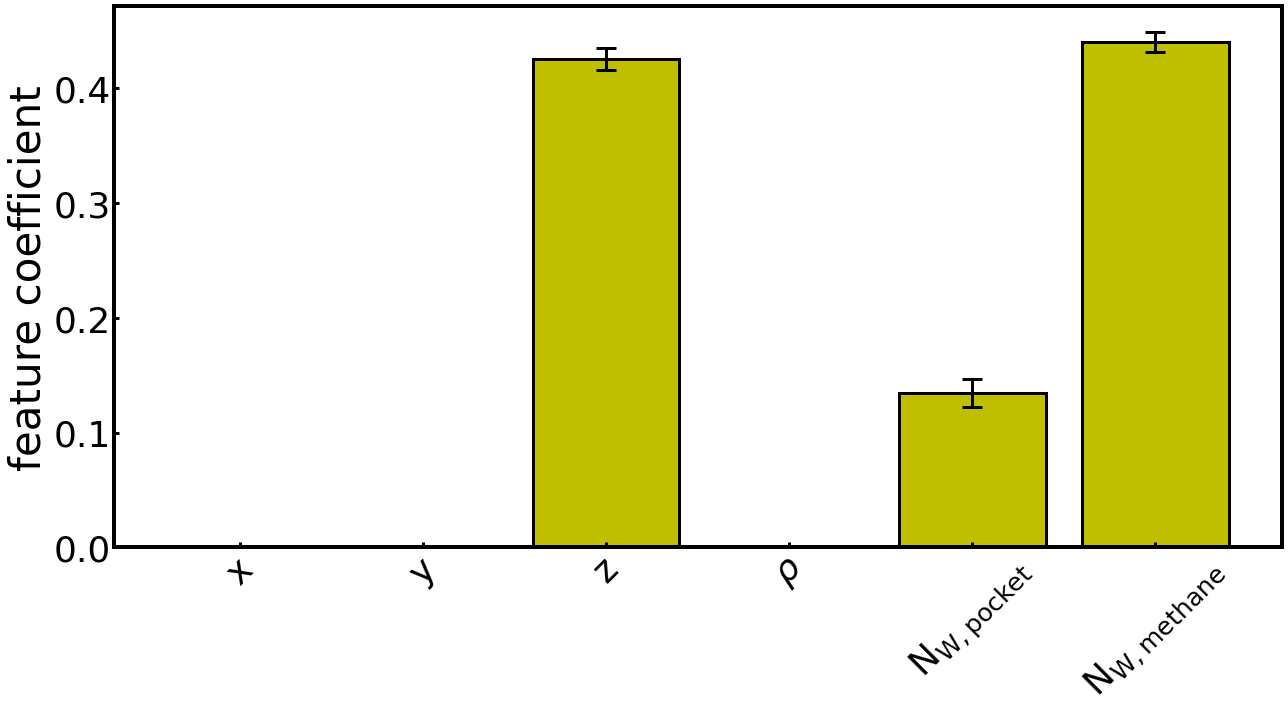

4146
9960
61664
22269
48874
17250
23024
38469
8894
1432
(10, 6)


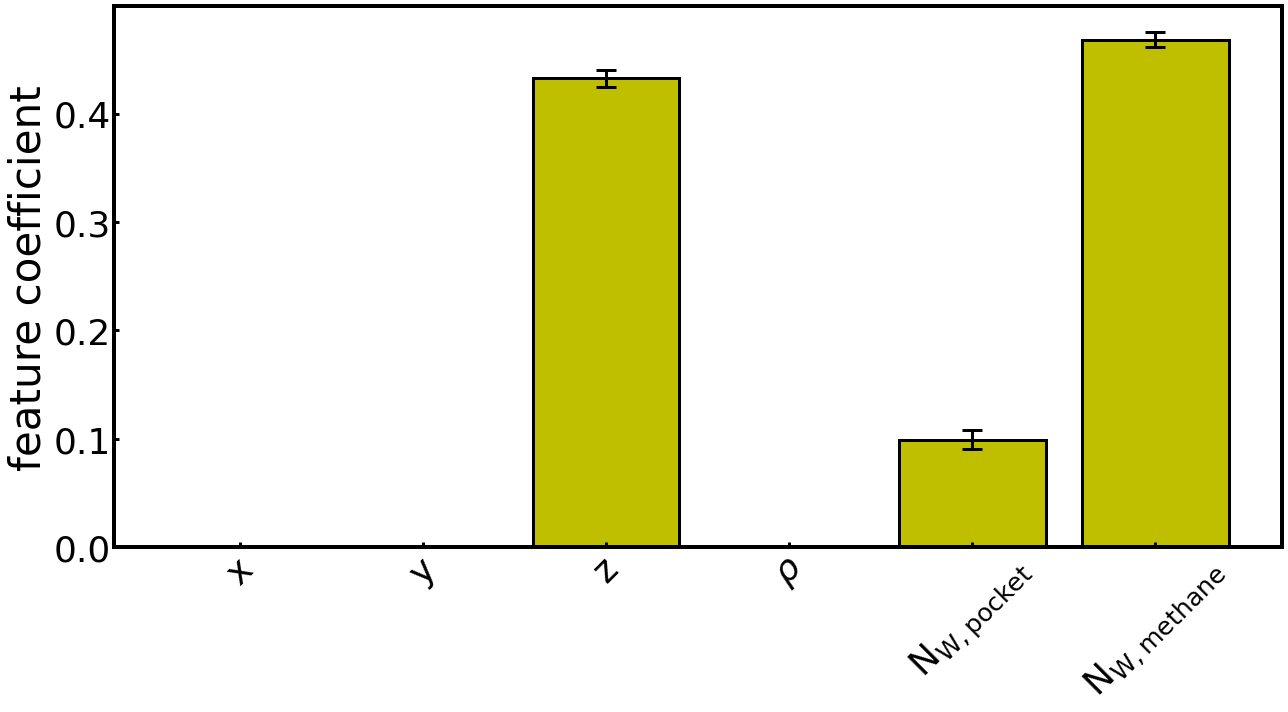

6557
1290
26998
14316
73439
660
14919
69305
37058
21188
(10, 6)


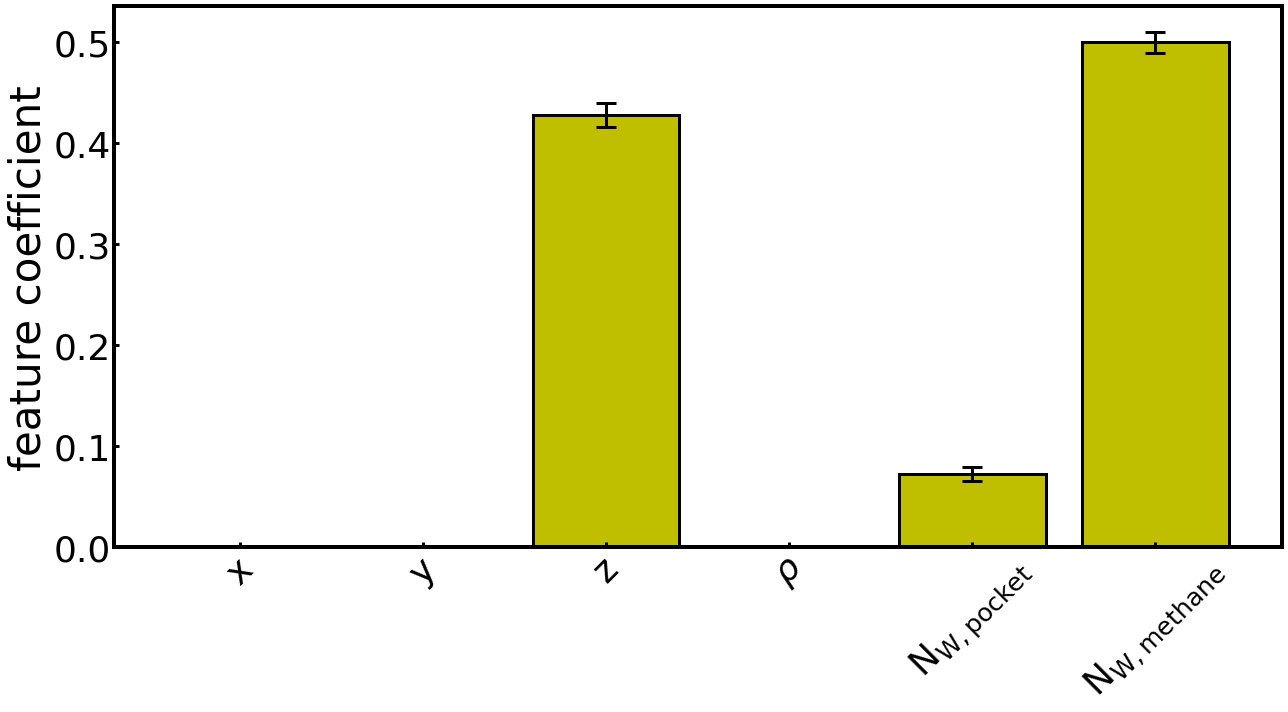

49440
53907
23524
2612
25656
48782
43700
37465
26482
13296
(10, 6)


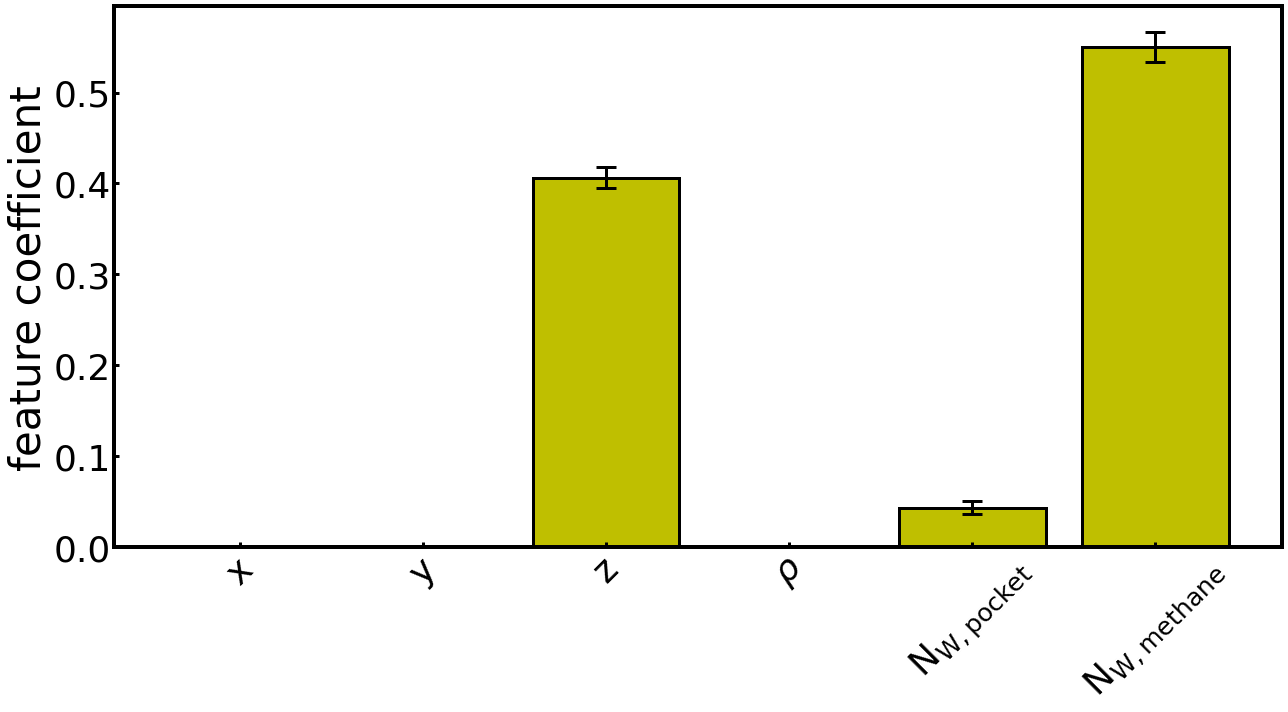

54951
5468
29468
17739
56112
38272
56199
49839
24059
49838
(10, 6)


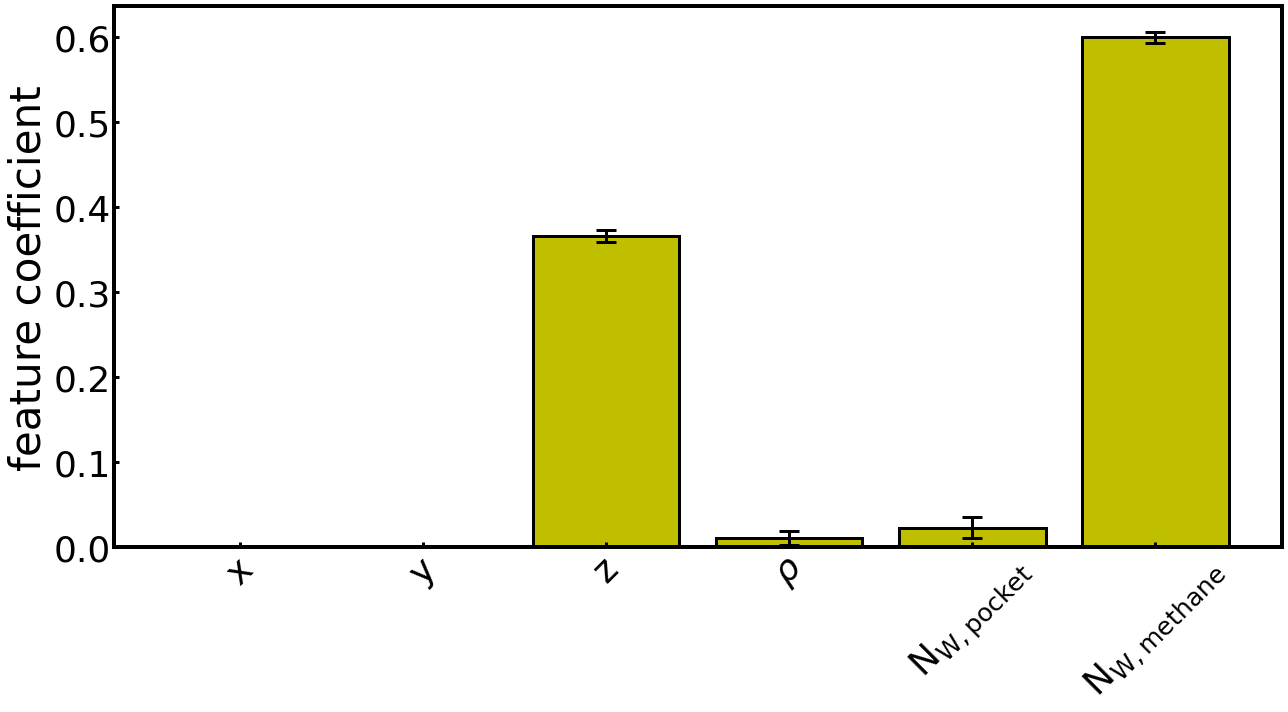

In [18]:
for i in range(9):
    path = "../TERP/gamma1e-3_level_set_%s/frame_" % (i)
    result_list = []
    scores_list = []
    random_frames = np.loadtxt('gamma1e-3_frames_level_set_%s.txt' % i, dtype = int)
    for frame in random_frames:
        try:
            print(frame)
            result_list.append(np.load(path + str(frame) + '/TERP_results_2/optimal_feature_weights.npy'))
            scores_list.append(np.load(path + str(frame) + '/TERP_results_2/unfaithfulness_scores_final.npy'))
        except FileNotFoundError:
            pass
        
    result_array = np.vstack([*result_list])
    scores_array = np.vstack([*scores_list])

    print(result_array.shape)
    
    mean_result = abs(result_array).mean(0)
    sem_result = 2 * abs(result_array).std(0) / np.sqrt(result_array.shape[0])

    mean_scores = abs(scores_array).mean(0)
    sem_scores = 2 * abs(scores_array).std(0) / np.sqrt(scores_array.shape[0])
    
    labels = ['x', 'y', 'z', r'$\rho$', r'N$_{\mathrm{W, pocket}}$', r'N$_{\mathrm{W, methane}}$']
    # transition between states 0 and 1
    plt.figure(figsize = (18, 10))
    plt.bar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, color = 'y',
           edgecolor = 'k', linewidth = 3, capsize = 10, error_kw = dict(lw = 3, capsize = 10, capthick = 3))
    #plt.fill_between(np.arange(result_array.shape[1]), mean_result - sem_result, mean_result, alpha = 0.5,
    #                color = 'y')
    #plt.fill_between(np.arange(result_array.shape[1]), mean_result, sem_result + mean_result, alpha = 0.5,
    #                color = 'y')
    #plt.plot(np.arange(result_array.shape[1]), mean_result, lw = 3, color = 'y')
    #plt.errorbar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, capsize = 8, elinewidth = 3,
    #            ecolor = 'k', c = 'k', lw = 3)
    plt.xticks(ticks = np.arange(mean_result.shape[0]), labels = labels, rotation = 45, fontsize = 36)
    plt.yticks(fontsize = 36)
    plt.ylabel('feature coefficient', fontsize = 42)
    #plt.yscale('log')
    plt.tight_layout()
    #plt.savefig('gamma1e-3_TERP_features_coefficients_methane.pdf', dpi = 300)
    plt.show()
    plt.close()

(10, 6)
(10, 6)
(10, 6)
(10, 6)
(10, 6)
(10, 6)
(10, 6)
(10, 6)
(10, 6)


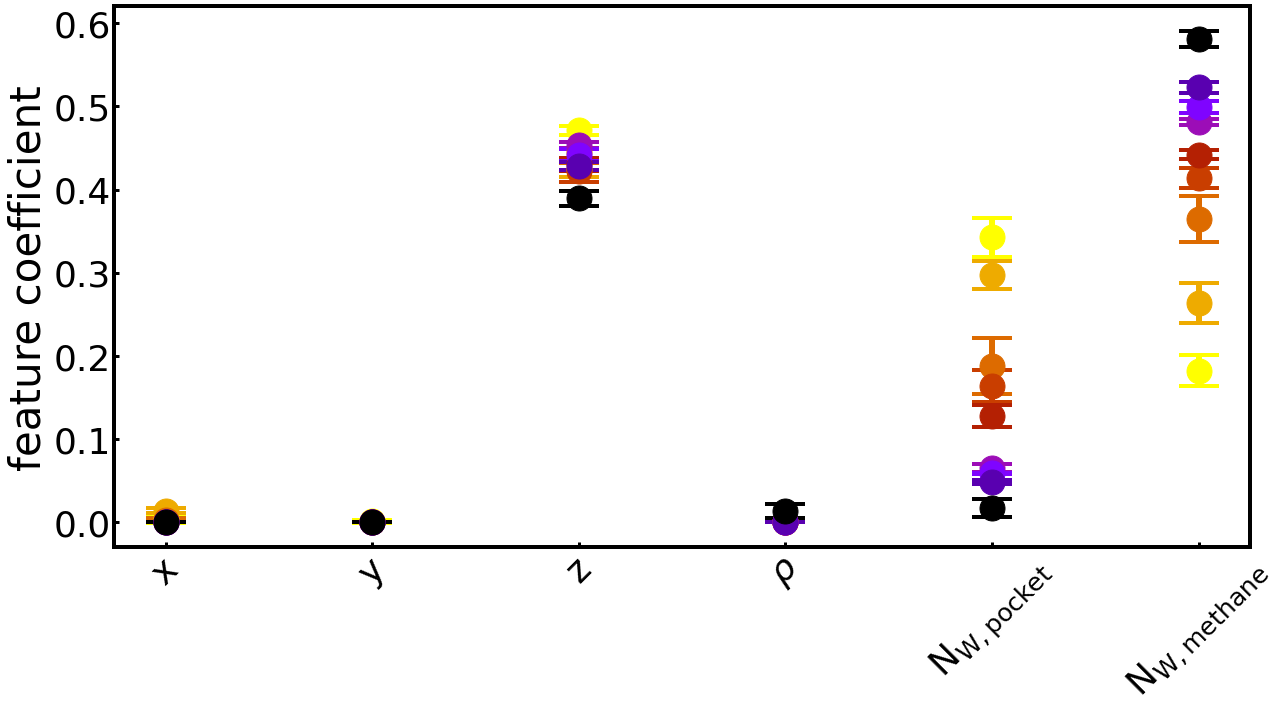

In [25]:
nsets = 9
colors = plt.cm.gnuplot_r(np.linspace(0, 1, nsets))
plt.figure(figsize = (18, 10))
mean_result_list = []
sem_result_list = []

for i in range(nsets):
    path = "../TERP/gamma1e-3_level_set_%s/frame_" % (i)
    result_list = []
    scores_list = []
    random_frames = np.loadtxt('gamma1e-3_frames_level_set_%s.txt' % i, dtype = int)
    for frame in random_frames:
        try:
            #print(frame)
            result_list.append(np.load(path + str(frame) + '/TERP_results_2/optimal_feature_weights.npy'))
            scores_list.append(np.load(path + str(frame) + '/TERP_results_2/unfaithfulness_scores_final.npy'))
        except FileNotFoundError:
            pass
        
    result_array = np.vstack([*result_list])
    scores_array = np.vstack([*scores_list])

    print(result_array.shape)
    
    mean_result = abs(result_array).mean(0)
    sem_result = 2 * abs(result_array).std(0) / np.sqrt(result_array.shape[0])
    
    mean_result_list.append(mean_result)
    sem_result_list.append(sem_result)

    mean_scores = abs(scores_array).mean(0)
    sem_scores = 2 * abs(scores_array).std(0) / np.sqrt(scores_array.shape[0])
    
    labels = ['x', 'y', 'z', r'$\rho$', r'N$_{\mathrm{W, pocket}}$', r'N$_{\mathrm{W, methane}}$']
    # transition between states 0 and 1
    plt.errorbar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, color = colors[i],
                elinewidth = 6, capsize = 20, lw = 0, marker = 'o', markersize = 25, capthick = 4)
    #plt.bar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, color = 'y',
    #       edgecolor = 'k', linewidth = 3, capsize = 10, error_kw = dict(lw = 3, capsize = 10, capthick = 3))
    #plt.fill_between(np.arange(result_array.shape[1]), mean_result - sem_result, mean_result, alpha = 0.5,
    #                color = 'y')
    #plt.fill_between(np.arange(result_array.shape[1]), mean_result, sem_result + mean_result, alpha = 0.5,
    #                color = 'y')
    #plt.plot(np.arange(result_array.shape[1]), mean_result, lw = 3, color = 'y')
    #plt.errorbar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, capsize = 8, elinewidth = 3,
    #            ecolor = 'k', c = 'k', lw = 3)
plt.xticks(ticks = np.arange(mean_result.shape[0]), labels = labels, rotation = 45, fontsize = 36)
plt.yticks(fontsize = 36)
plt.ylabel('feature coefficient', fontsize = 42)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig('gamma1e-3_TERP_features_coefficients_level_sets.pdf', dpi = 300)
plt.show()
plt.close()

mean_results = np.array(mean_result_list)
sem_results = np.array(sem_result_list)

0
1
2
3
4
5


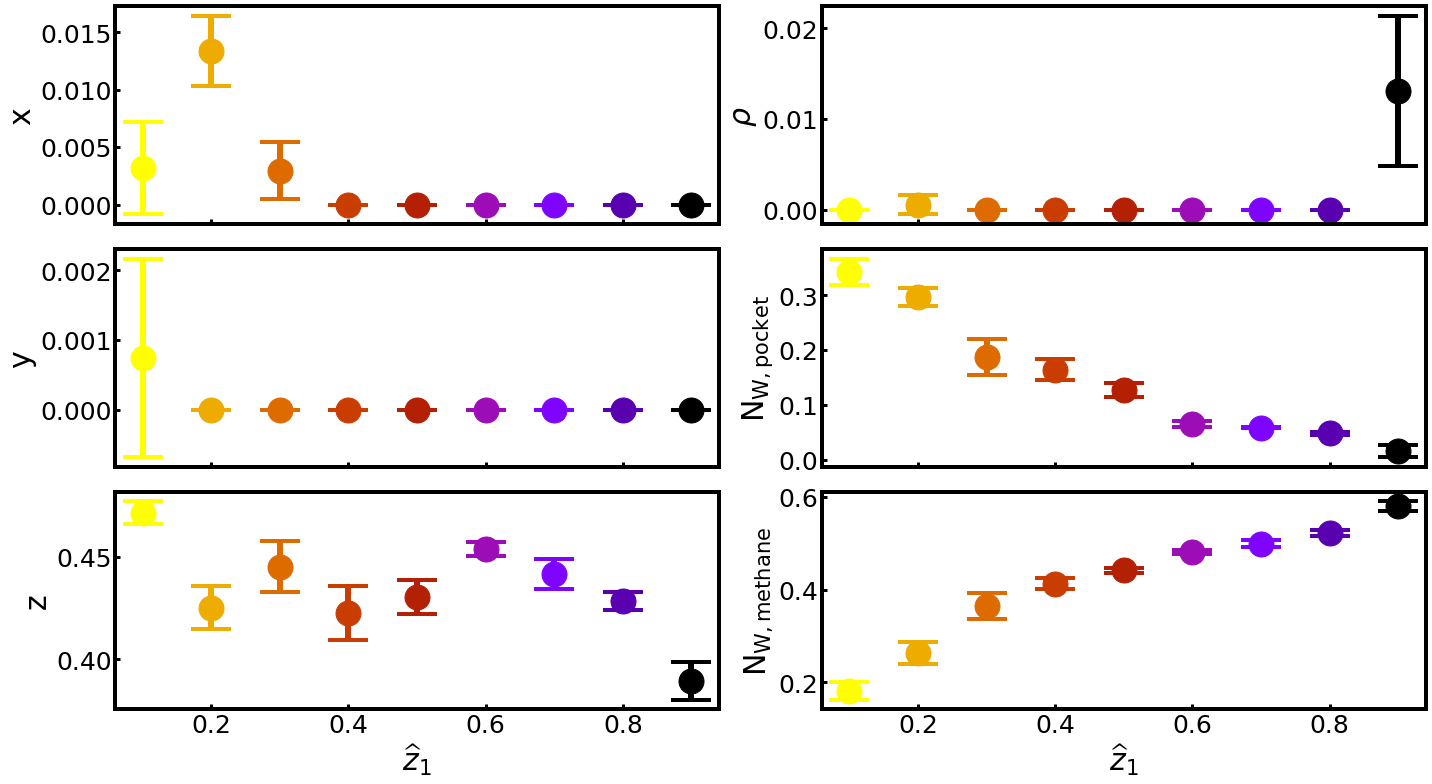

In [26]:
nsets = 9
colors = plt.cm.gnuplot_r(np.linspace(0, 1, nsets))
labels = ['x', 'y', 'z', r'$\rho$', r'N$_{\mathrm{W, pocket}}$', r'N$_{\mathrm{W, methane}}$']


fig, ax = plt.subplots(3, 2, figsize = (20, 11), sharex = True)
plt.subplots_adjust(left=.125, bottom=0.0, right=0.9, 
                    top=0.9, wspace=.5,hspace=0.5)
for i in range(data.shape[1]):
    print(i)
    pts = np.linspace(0.1, 0.9, 9)
    
    if i >= 3:
        for j, pt in enumerate(pts):
            ax[i - 3, 1].errorbar(pt, mean_results[j,i], yerr = sem_results[j,i], color = colors[j],
                        elinewidth = 6, capsize = 20, lw = 0, marker = 'o', markersize = 25, capthick = 4)
        ax[i - 3, 1].set_ylabel(labels[i])
        if i == 5:
            ax[i - 3, 1].set_xlabel(r'$\widehat{z}_1$')
    else:
        for j, pt in enumerate(pts):
            ax[i - 3, 0].errorbar(pt, mean_results[j,i], yerr = sem_results[j,i], color = colors[j],
                        elinewidth = 6, capsize = 20, lw = 0, marker = 'o', markersize = 25, capthick = 4)
        ax[i - 3, 0].set_ylabel(labels[i])
        if i == 2:
            ax[i - 3, 0].set_xlabel(r'$\widehat{z}_1$')

plt.tight_layout()
plt.savefig('gamma1e-3_TERP_level_sets_panel.pdf', dpi = 300)
plt.show()
plt.close()

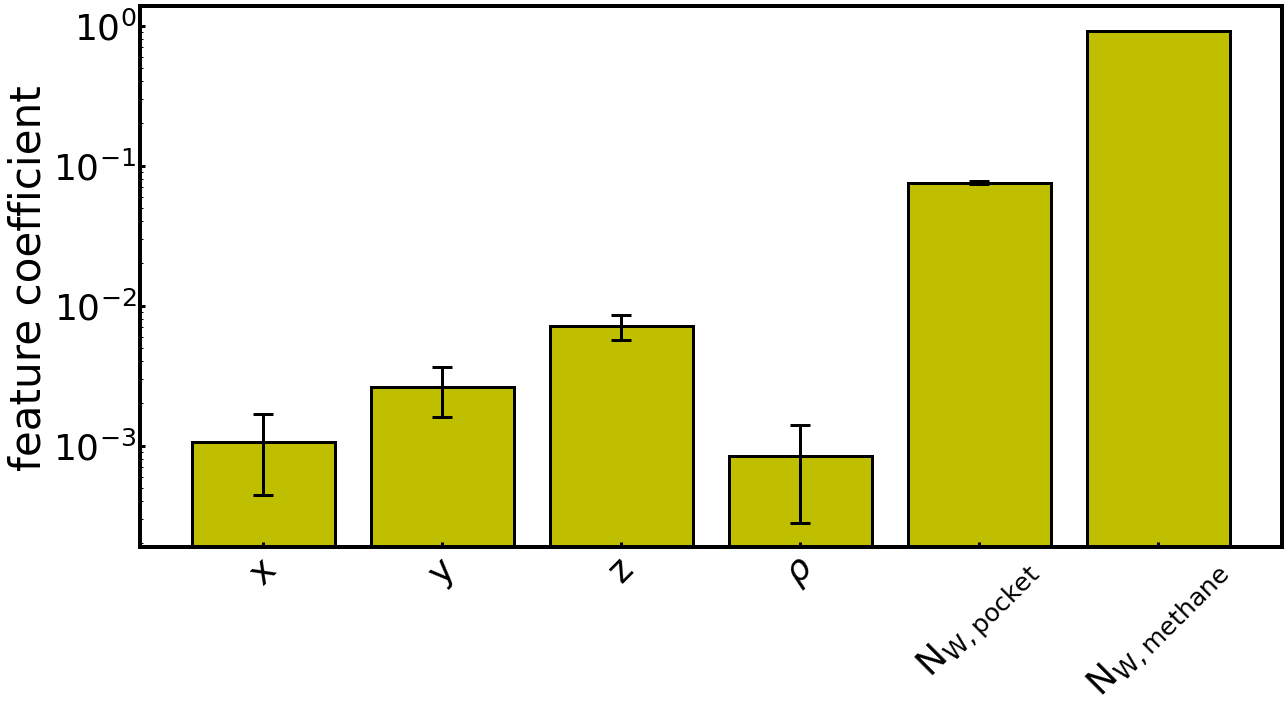

In [75]:
labels = ['x', 'y', 'z', r'$\rho$', r'N$_{\mathrm{W, pocket}}$', r'N$_{\mathrm{W, methane}}$']
# transition between states 0 and 1
plt.figure(figsize = (18, 10))
plt.bar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, color = 'y',
       edgecolor = 'k', linewidth = 3, capsize = 10, error_kw = dict(lw = 3, capsize = 10, capthick = 3))
#plt.fill_between(np.arange(result_array.shape[1]), mean_result - sem_result, mean_result, alpha = 0.5,
#                color = 'y')
#plt.fill_between(np.arange(result_array.shape[1]), mean_result, sem_result + mean_result, alpha = 0.5,
#                color = 'y')
#plt.plot(np.arange(result_array.shape[1]), mean_result, lw = 3, color = 'y')
#plt.errorbar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, capsize = 8, elinewidth = 3,
#            ecolor = 'k', c = 'k', lw = 3)
plt.xticks(ticks = np.arange(mean_result.shape[0]), labels = labels, rotation = 45, fontsize = 36)
plt.yticks(fontsize = 36)
plt.ylabel('feature coefficient', fontsize = 42)
plt.yscale('log')
plt.tight_layout()
#plt.savefig('gamma1e-1_TERP_features_coefficients_methane.pdf', dpi = 300)
plt.show()
plt.close()

In [69]:
scores_array.min(0)

array([0.29884733, 0.28782377, 0.2877651 , 0.28771972, 0.28771623,
       0.28771592])

In [70]:
scores_array.max(0)

array([0.70022483, 0.69581307, 0.69558305, 0.69552328, 0.69547126,
       0.69546944])

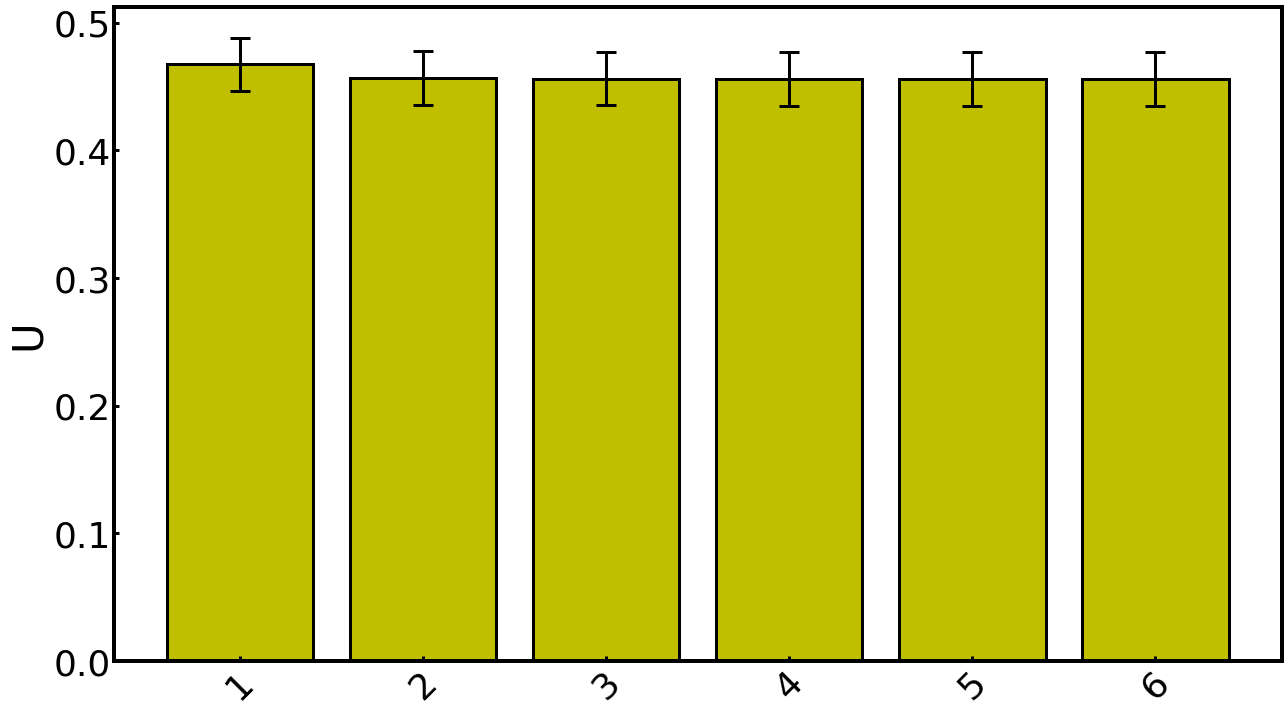

In [71]:
# transition between states 0 and 1
plt.figure(figsize = (18, 10))
plt.bar(np.arange(scores_array.shape[1]), mean_scores, yerr = sem_scores, color = 'y',
       edgecolor = 'k', linewidth = 3, capsize = 10, error_kw = dict(lw = 3, capsize = 10, capthick = 3))

plt.xticks(ticks = np.arange(mean_result.shape[0]), labels = np.arange(1, 7), rotation = 45, fontsize = 36)
plt.yticks(fontsize = 36)
plt.ylabel('U', fontsize = 42)
plt.tight_layout()
#plt.savefig('gamma1e-1_TERP_features_coefficients_methane.pdf', dpi = 300)
plt.show()
plt.close()

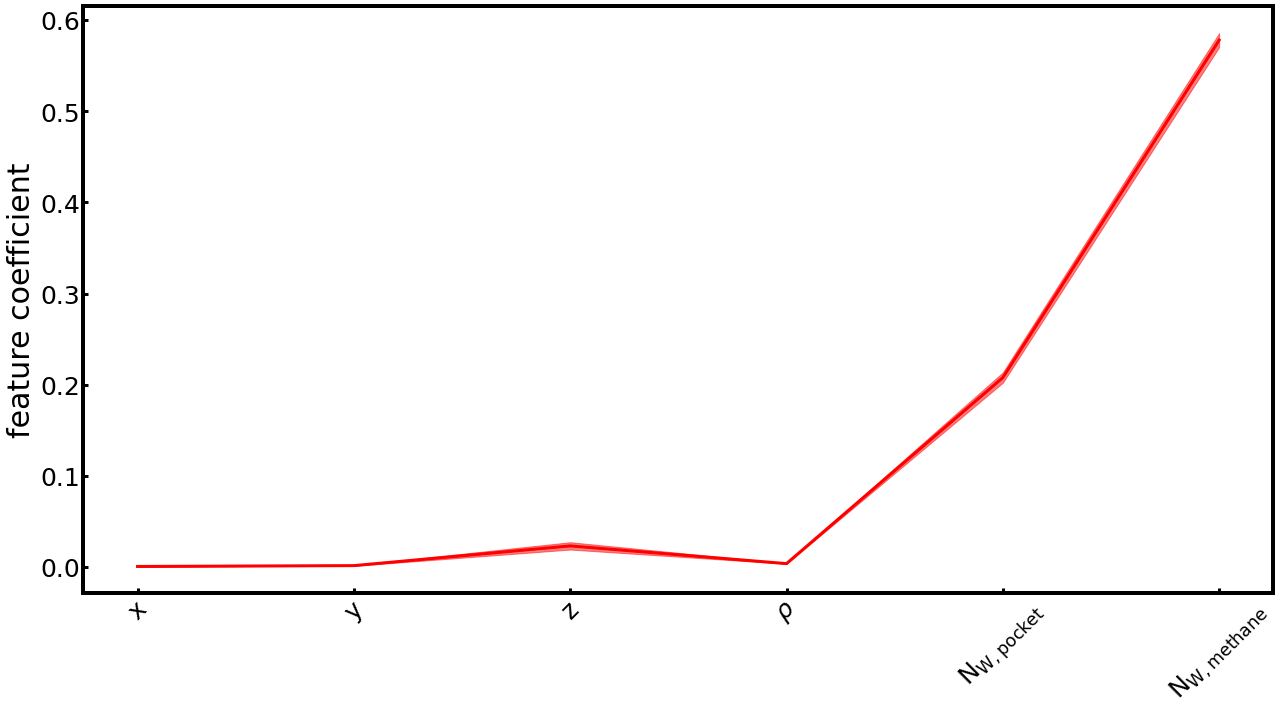

In [68]:
plt.figure(figsize = (18, 10))
plt.fill_between(np.arange(result_array.shape[1]), mean_result - sem_result, mean_result, alpha = 0.5,
                color = 'r')
plt.fill_between(np.arange(result_array.shape[1]), mean_result, sem_result + mean_result, alpha = 0.5,
                color = 'r')
plt.plot(np.arange(result_array.shape[1]), mean_result, lw = 3, color = 'r')
#plt.errorbar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, capsize = 8, elinewidth = 3,
#            ecolor = 'k', c = 'k', lw = 3)
plt.xticks(ticks = np.arange(mean_result.shape[0]), labels = labels, rotation = 45)
plt.ylabel('feature coefficient')
plt.tight_layout()
plt.savefig('TERP_features_coefficients_methane.pdf', dpi = 300)
plt.show()
plt.close()

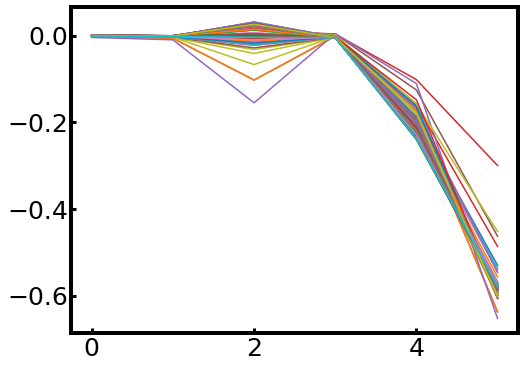

In [69]:
for i in range(result_array.shape[0]):
    plt.plot(result_array[i,:])
plt.show()
plt.close()

In [14]:
frames = np.loadtxt('random_frames.txt', dtype = int)

2


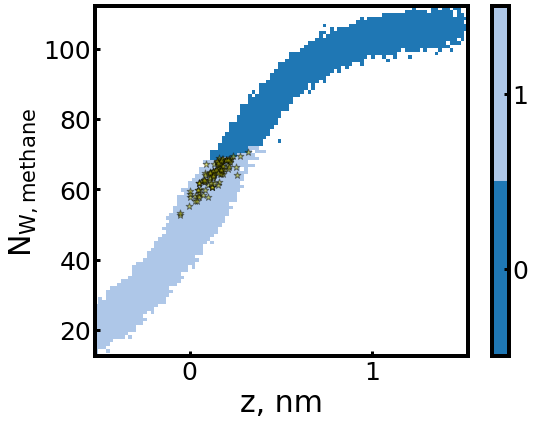

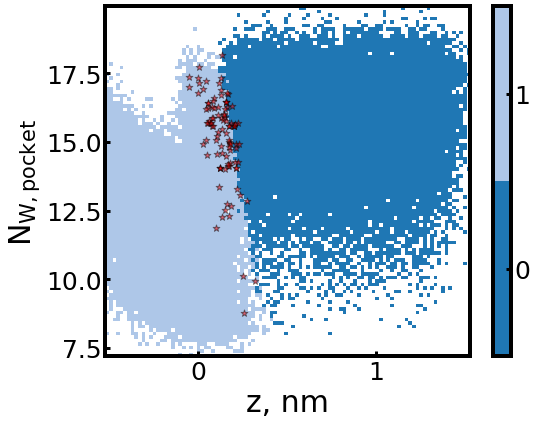

In [18]:
# get frames at the transition state


idx = np.argwhere(np.all(traj_labels == 0, axis=0))
labels = np.delete(traj_labels, idx, axis=1)
dtrajs = labels.argmax(1)
nstates = len(np.unique(dtrajs))
print(nstates)

hist=plt.hist2d(x,y,bins=100)


state_num=labels.shape[1]
state_labels=np.arange(state_num)

hist_state=np.zeros([state_num]+list(hist[0].shape))

for i in range(state_num):
    hist_state[i]=plt.hist2d(x,y,bins=[hist[1],hist[2]],weights=labels[:,i])[0]

label_map50=np.argmax(hist_state,axis=0).astype(float)
label_map50[hist[0]==0]=np.nan
plt.close()
fig, ax = plt.subplots()

fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: state_labels[x])
tickz = np.arange(0,len(state_labels))

cMap = c.ListedColormap(plt.cm.tab20.colors[0:nstates])
im=ax.pcolormesh(hist[1], hist[2], label_map50.T, cmap=cMap, vmin=-0.5, vmax=len(state_labels)-0.5)
cb1 = fig.colorbar(im,ax=ax,format=fmt, ticks=tickz)

# plot labels of occupied states
dummy = labels.sum(0)
xloc = -0.75
#for n, i in enumerate(dummy):
#    if i != 0:
#        ax.text(xloc,0,str(n),horizontalalignment='center',verticalalignment='center',fontsize=64)
#        xloc += 0.2
plt.scatter(x[frames], Nwm[frames], c = 'y', marker = '*', s = 50, zorder = 10, alpha = 0.5, edgecolor = 'k')
plt.xlabel(r"z, nm")
plt.ylabel(r"N$_{\mathrm{W, methane}}$")
plt.tight_layout()
plt.savefig('./z_Nwm_metastable_decomposition.pdf', dpi = 300)
plt.show()
plt.close()


hist=plt.hist2d(x,Nwp,bins=100)


state_num=labels.shape[1]
state_labels=np.arange(state_num)

hist_state=np.zeros([state_num]+list(hist[0].shape))

for i in range(state_num):
    hist_state[i]=plt.hist2d(x,Nwp,bins=[hist[1],hist[2]],weights=labels[:,i])[0]

label_map50=np.argmax(hist_state,axis=0).astype(float)
label_map50[hist[0]==0]=np.nan
plt.close()
fig, ax = plt.subplots()

fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: state_labels[x])
tickz = np.arange(0,len(state_labels))

cMap = c.ListedColormap(plt.cm.tab20.colors[0:nstates])
im=ax.pcolormesh(hist[1], hist[2], label_map50.T, cmap=cMap, vmin=-0.5, vmax=len(state_labels)-0.5)
cb1 = fig.colorbar(im,ax=ax,format=fmt, ticks=tickz)

# plot labels of occupied states
dummy = labels.sum(0)
xloc = -0.75
#for n, i in enumerate(dummy):
#    if i != 0:
#        ax.text(xloc,0,str(n),horizontalalignment='center',verticalalignment='center',fontsize=64)
#        xloc += 0.2
plt.scatter(x[frames], Nwp[frames], c = 'r', marker = '*', s = 50, zorder = 10, alpha = 0.5, edgecolor = 'k')
plt.xlabel(r"z, nm")
plt.ylabel(r"N$_{\mathrm{W, pocket}}$")
plt.tight_layout()
plt.savefig('./z_Nwp_metastable_decomposition.pdf', dpi = 300)
plt.show()
plt.close()